# Successful TV-shows

In [2]:
dataset_meta = DatasetMeta(SchemaName.NETFLIX, NetflixDatasetName.DATASET1)
dataset = Dataset(dataset_meta)
dataset_df = dataset.load_data()

dataset_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA (adults only),4,TV Dramas,In a future where the elite inhabit an island ...
2,2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA (adults only),93,International Movies,After a devastating earthquake hits Mexico Cit...
3,3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R (adults only),78,International Movies,"When an army recruit is found dead, his fellow..."
4,4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13 (13+ children),80,Independent Movies,"In a postapocalyptic world, rag-doll robots hi..."
5,5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13 (13+ children),123,Dramas,A brilliant group of students become card-coun...


In [3]:
actions_lst = [
    FilterAction(filtered_column=Column('type'), filter_operator=FilterOperator.EQUAL, filter_term='TV Show'),
    FilterAction(filtered_column=Column('duration'), filter_operator=FilterOperator.GREATER, filter_term=2),
    GroupAction(grouped_column=Column('country'), aggregated_column=Column('show_id'), 
                aggregation_function=AggregationFunction.COUNT),
    BackAction(),
    FilterAction(filtered_column=Column('country'), filter_operator=FilterOperator.EQUAL, filter_term='United States'),
    GroupAction(grouped_column=Column('listed_in'), aggregated_column=Column('show_id'), 
                aggregation_function=AggregationFunction.COUNT),
    BackAction(),
    FilterAction(filtered_column=Column('listed_in'), filter_operator=FilterOperator.EQUAL, filter_term='TV Comedies'),
    GroupAction(grouped_column=Column('rating'), aggregated_column=Column('show_id'), 
                aggregation_function=AggregationFunction.COUNT),
]
    
actions_simulator = ActionsSimulator(dataset=dataset)
action_execution_result_lst = actions_simulator.run_actions(actions_lst)

### Session Tree:

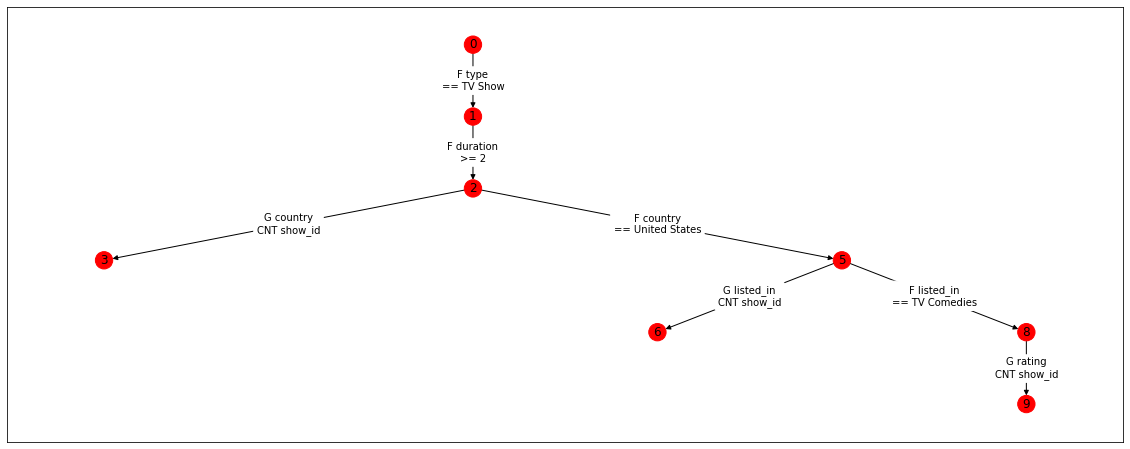

In [4]:
draw_nx_display_tree(action_execution_result_lst)

### Query 1: <span style="color:blue;">Filter type == TV Show</span>

In [5]:
display(prepare_display(action_execution_result_lst, 0))

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA (adults only),4,TV Dramas,In a future where the elite inhabit an island ...
6,6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA (adults only),1,TV Dramas,A genetics professor experiments with a treatm...
12,12,TV Show,1983,NaN,"Robert Więckiewicz, Maciej Musiał, Michalina O...",Poland,"November 30, 2018",2018,TV-MA (adults only),1,TV Dramas,"In this dark alt-history thriller, a naïve law..."
13,13,TV Show,1994,Diego Enrique Osorno,NaN,Mexico,"May 17, 2019",2019,TV-MA (adults only),1,Crime TV Shows,Archival video and new interviews examine Mexi...
17,17,TV Show,Feb-09,NaN,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NaN,"March 20, 2019",2018,TV-14 (14+ children),1,TV Dramas,"As a psychology professor faces Alzheimer's, h..."
...,...,...,...,...,...,...,...,...,...,...,...,...
7768,7768,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG (older children),1,TV Dramas,"Strong-willed, middle-class Kashaf and carefre..."
7776,7776,TV Show,Zoids Wild,NaN,"Kensho Ono, Takahiro Sakurai, Mikako Komatsu, ...",Japan,"August 14, 2020",2018,TV-Y7 (7+ children),1,Kids' TV,A quest for freedom and legendary treasure beg...
7778,7778,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7 (7+ children),2,TV Comedies,"While living alone in a spooky town, a young g..."
7780,7780,TV Show,Zona Rosa,NaN,"Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...",Mexico,"November 26, 2019",2019,TV-MA (adults only),1,International TV Shows,An assortment of talent takes the stage for a ...


### Query 2: <span style="color:DimGray">Filter type == TV Show AND</span> <span style="color:blue;">Filter duration >= 2</span>

In [6]:
display(prepare_display(action_execution_result_lst, 1))

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA (adults only),4,TV Dramas,In a future where the elite inhabit an island ...
25,25,TV Show,​SAINT SEIYA: Knights of the Zodiac,NaN,"Bryson Baugus, Emily Neves, Blake Shepard, Pat...",Japan,"January 23, 2020",2020,TV-14 (14+ children),2,Anime Series,Seiya and the Knights of the Zodiac rise again...
64,64,TV Show,13 Reasons Why,NaN,"Dylan Minnette, Katherine Langford, Kate Walsh...",United States,"June 5, 2020",2020,TV-MA (adults only),4,TV Dramas,"After a teenage girl's perplexing suicide, a c..."
65,65,TV Show,13 Reasons Why: Beyond the Reasons,NaN,"Dylan Minnette, Katherine Langford, Kate Walsh...",United States,"August 23, 2019",2019,TV-MA (adults only),3,Crime TV Shows,"Cast members, writers, producers and mental he..."
109,109,TV Show,3Below: Tales of Arcadia,NaN,"Tatiana Maslany, Diego Luna, Nick Offerman, Ni...",United States,"July 12, 2019",2019,TV-Y7 (7+ children),2,TV Action,"After crash-landing on Earth, two royal teen a..."
...,...,...,...,...,...,...,...,...,...,...,...,...
7754,7754,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2016,TV-PG (older children),2,TV Dramas,"During the Mongol invasions, Yunus Emre leaves..."
7756,7756,TV Show,Z Nation,NaN,"Nat Zang, Russell Hodgkinson, Michael Welch, A...",United States,"January 27, 2019",2018,TV-MA (adults only),5,TV Comedies,A team embarks on a perilous cross-country mis...
7757,7757,TV Show,Z4,NaN,"Apollo Costa, Gabriel Santana, Matheus Lustosa...",Brazil,"February 22, 2019",2018,TV-PG (older children),2,Kids' TV,Fading music biz veteran Zé realizes he has ju...
7760,7760,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...",United States,"September 13, 2018",2016,TV-Y7 (7+ children),3,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...


### Query 3: <span style="color:DimGray">Filter type == TV Show AND Filter duration >= 2 AND</span> <span style="color:blue;">Group by country CNT(show_id)</span>

In [7]:
display(prepare_display(action_execution_result_lst, 2))

,show_id
country,
United States,371
United Kingdom,88
Japan,57
Canada,55
Australia,22
South Korea,20
France,19
Spain,17
Mexico,12


### Query 5: <span style="color:DimGray">Filter type == TV Show AND Filter duration >= 2 AND</span> <span style="color:blue;">Filter country == United States</span>

In [8]:
display(prepare_display(action_execution_result_lst, 4))

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
64,64,TV Show,13 Reasons Why,NaN,"Dylan Minnette, Katherine Langford, Kate Walsh...",United States,"June 5, 2020",2020,TV-MA (adults only),4,TV Dramas,"After a teenage girl's perplexing suicide, a c..."
65,65,TV Show,13 Reasons Why: Beyond the Reasons,NaN,"Dylan Minnette, Katherine Langford, Kate Walsh...",United States,"August 23, 2019",2019,TV-MA (adults only),3,Crime TV Shows,"Cast members, writers, producers and mental he..."
109,109,TV Show,3Below: Tales of Arcadia,NaN,"Tatiana Maslany, Diego Luna, Nick Offerman, Ni...",United States,"July 12, 2019",2019,TV-Y7 (7+ children),2,TV Action,"After crash-landing on Earth, two royal teen a..."
226,226,TV Show,A Series of Unfortunate Events,NaN,"Neil Patrick Harris, Patrick Warburton, Malina...",United States,"January 1, 2019",2019,TV-PG (older children),3,TV Comedies,The extraordinary Baudelaire orphans face tria...
289,289,TV Show,Abstract: The Art of Design,NaN,"Christoph Niemann, Tinker Hatfield, Es Devlin,...",United States,"September 25, 2019",2019,TV-14 (14+ children),2,Docuseries,Step inside the minds of the most innovative d...
...,...,...,...,...,...,...,...,...,...,...,...,...
7661,7661,TV Show,Word Party,NaN,"Victor Yerrid, Alice Dinnean, Alon Williams, D...",United States,"January 21, 2020",2020,TV-Y (all children),4,Kids' TV,"Meet Bailey, Franny, Kip and Lulu. They're ado..."
7722,7722,TV Show,You,Lee Toland Krieger,"Penn Badgley, Elizabeth Lail, Shay Mitchell, J...",United States,"December 26, 2019",2019,TV-MA (adults only),2,TV Dramas,"Obsessed with an aspiring writer, a charming b..."
7736,7736,TV Show,Young & Hungry,NaN,"Emily Osment, Kym Whitley, Rex Lee, Jonathan S...",United States,"June 21, 2017",2017,TV-14 (14+ children),5,TV Comedies,A female food blogger is hired as a personal c...
7756,7756,TV Show,Z Nation,NaN,"Nat Zang, Russell Hodgkinson, Michael Welch, A...",United States,"January 27, 2019",2018,TV-MA (adults only),5,TV Comedies,A team embarks on a perilous cross-country mis...


### Query 6: <span style="color:DimGray">Filter type == TV Show AND Filter duration >= 2 AND Filter country == United States AND</span> <span style="color:blue;">Group by listed_in CNT(show_id)</span>

In [9]:
display(prepare_display(action_execution_result_lst, 5))

,show_id
listed_in,
TV Comedies,130
TV Dramas,85
Kids' TV,53
Docuseries,26
Reality TV,26
TV Action,24
Crime TV Shows,13
TV Horror,5
Stand-Up Comedy & Talk Shows,4


### Query 8: <span style="color:DimGray">Filter type == TV Show AND Filter duration >= 2 AND Filter country == United States AND</span> <span style="color:blue;">Filter listed_in == TV Comedies</span>

In [10]:
display(prepare_display(action_execution_result_lst, 7))

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
226,226,TV Show,A Series of Unfortunate Events,NaN,"Neil Patrick Harris, Patrick Warburton, Malina...",United States,"January 1, 2019",2019,TV-PG (older children),3,TV Comedies,The extraordinary Baudelaire orphans face tria...
381,381,TV Show,Alexa & Katie,NaN,"Paris Berelc, Isabel May, Tiffani Thiessen, Em...",United States,"June 13, 2020",2020,TV-G (all ages),4,TV Comedies,Alexa is battling cancer. But with her best fr...
412,412,TV Show,All Hail King Julien,NaN,"Danny Jacobs, Andy Richter, Henry Winkler, Kev...",United States,"December 1, 2017",2017,TV-Y7 (7+ children),5,TV Comedies,In this Emmy winner for Outstanding Children's...
476,476,TV Show,American Vandal,NaN,"Tyler Alvarez, Griffin Gluck, Jimmy Tatro, Cam...",United States,"September 14, 2018",2018,TV-MA (adults only),2,TV Comedies,A high school is rocked by an act of vandalism...
584,584,TV Show,Arrested Development,NaN,"Jason Bateman, Portia de Rossi, Will Arnett, M...",United States,"May 29, 2018",2019,TV-MA (adults only),5,TV Comedies,It's the Emmy-winning story of a wealthy famil...
...,...,...,...,...,...,...,...,...,...,...,...,...
7504,7504,TV Show,We Bare Bears,NaN,"Eric Edelstein, Demetri Martin, Bobby Moynihan",United States,"February 12, 2020",2018,TV-Y (all children),2,TV Comedies,"Grizzly, Panda and Ice Bear are three adopted ..."
7521,7521,TV Show,Weeds,NaN,"Mary-Louise Parker, Hunter Parrish, Alexander ...",United States,"April 1, 2014",2012,TV-MA (adults only),8,TV Comedies,A suburban mother starts selling marijuana to ...
7572,7572,TV Show,What's New Scooby-Doo?,NaN,"Frank Welker, Casey Kasem, Mindy Cohn, Grey De...",United States,"December 15, 2019",2005,TV-Y7 (7+ children),3,TV Comedies,Scooby-Doo and the gang enter the 21st century...
7736,7736,TV Show,Young & Hungry,NaN,"Emily Osment, Kym Whitley, Rex Lee, Jonathan S...",United States,"June 21, 2017",2017,TV-14 (14+ children),5,TV Comedies,A female food blogger is hired as a personal c...


### Query 9: <span style="color:DimGray">Filter type == TV Show AND Filter duration >= 2 AND Filter country == United States AND Filter listed_in == TV Comedies AND</span> <span style="color:blue;">Group by rating CNT(show_id)</span>

In [11]:
display(prepare_display(action_execution_result_lst, 8))

,show_id
rating,
TV-MA (adults only),50
TV-14 (14+ children),32
TV-PG (older children),18
TV-Y7 (7+ children),14
TV-G (all ages),12
TV-Y (all children),3
NR (not rated),1
